In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics

import time

In [9]:
column_names = ["Sequence Name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "Correct classification"]
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_fwf('yeast.data', header = None)
df.columns = ['unnamed', 'mcg',  'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Sequence_Name']
df


,unnamed,mcg,gvh,alm,mit,erl,pox,vac,nuc,Sequence_Name
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.50,0.00,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.50,0.00,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.50,0.00,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.50,0.00,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.50,0.00,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.50,0.00,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.50,0.00,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.50,0.00,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.50,0.00,0.53,0.39,NUC


In [10]:
#find number of null entries to see if there is a need to clean the dataset
df.isnull().sum()


unnamed          0
mcg              0
gvh              0
alm              0
mit              0
erl              0
pox              0
vac              0
nuc              0
Sequence_Name    0
dtype: int64

In [11]:
df.nunique()

unnamed          1462
mcg                81
gvh                79
alm                53
mit                78
erl                 2
pox                 3
vac                48
nuc                68
Sequence_Name      10
dtype: int64

In [12]:
df3 = df.iloc[:, [0,9]]
df3 = df3['Sequence_Name']
df3

0       MIT
1       MIT
2       MIT
3       NUC
4       MIT
       ... 
1479    ME2
1480    NUC
1481    ME2
1482    NUC
1483    CYT
Name: Sequence_Name, Length: 1484, dtype: object

In [13]:
df = df.drop(df.columns[[0,9]],axis = 1)
df

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.50,0.00,0.48,0.22
1,0.43,0.67,0.48,0.27,0.50,0.00,0.53,0.22
2,0.64,0.62,0.49,0.15,0.50,0.00,0.53,0.22
3,0.58,0.44,0.57,0.13,0.50,0.00,0.54,0.22
4,0.42,0.44,0.48,0.54,0.50,0.00,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.50,0.00,0.53,0.22
1480,0.47,0.43,0.61,0.40,0.50,0.00,0.48,0.47
1481,0.67,0.57,0.36,0.19,0.50,0.00,0.56,0.22
1482,0.43,0.40,0.60,0.16,0.50,0.00,0.53,0.39


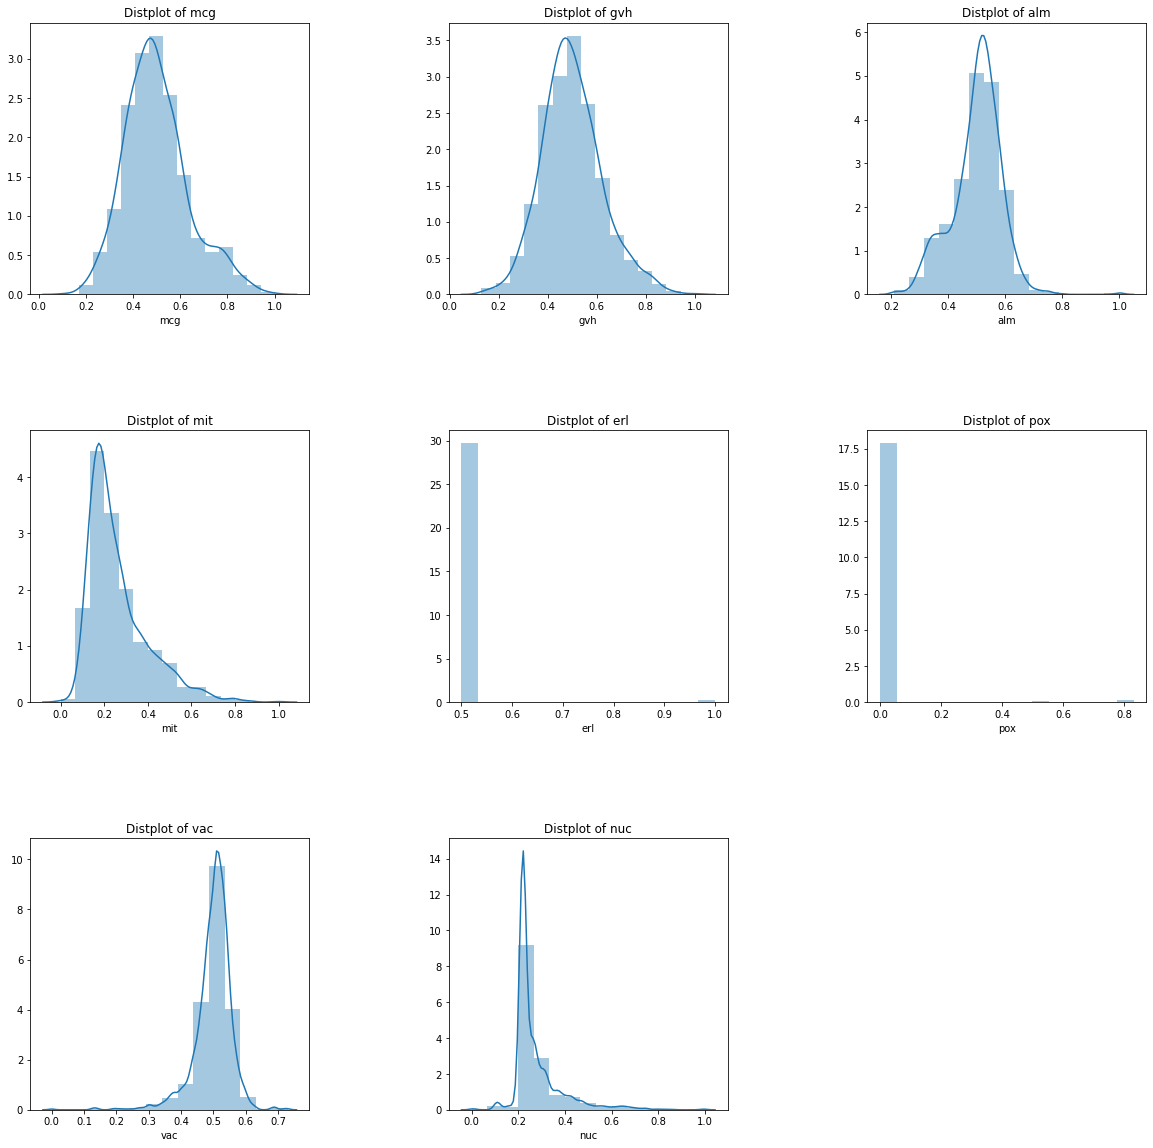

In [14]:
plt.figure(1 , figsize = (20 , 20))
n = 0 
float_column_names = ["mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc"]
for x in float_column_names:
    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_features_df

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.89,-0.35,-0.96,-0.10,-0.10,-0.34,-0.53
1,-0.51,1.37,-0.23,0.06,-0.10,-0.10,0.52,-0.53
2,1.02,0.97,-0.12,-0.81,-0.10,-0.10,0.52,-0.53
3,0.58,-0.48,0.81,-0.96,-0.10,-0.10,0.69,-0.53
4,-0.58,-0.48,-0.23,2.03,-0.10,-0.10,-0.34,-0.53
...,...,...,...,...,...,...,...,...
1479,2.26,0.97,-0.81,-0.67,-0.10,-0.10,0.52,-0.53
1480,-0.22,-0.56,1.27,1.01,-0.10,-0.10,-0.34,1.82
1481,1.24,0.57,-1.62,-0.52,-0.10,-0.10,1.04,-0.53
1482,-0.51,-0.81,1.15,-0.74,-0.10,-0.10,0.52,1.07


In [17]:
# import PCA
from sklearn.decomposition import PCA 
# Applying PCA to visualize data
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_features_df)
pca_data

array([[ 0.87233638, -0.09422448],
       [ 0.8134819 , -0.16052259],
       [ 1.28311478, -0.37504888],
       ...,
       [ 1.83867302, -1.18163864],
       [-1.46303883, -0.71536005],
       [ 0.6856017 , -0.21475233]])

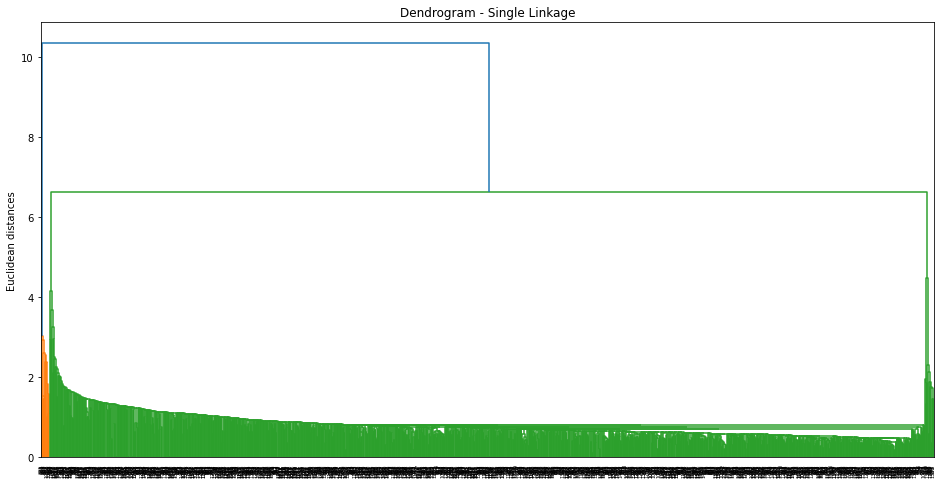

In [18]:
#Agglomerative clustering using single linkage method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "single"))

plt.title('Dendrogram - Single Linkage')
plt.ylabel('Euclidean distances')
plt.show()

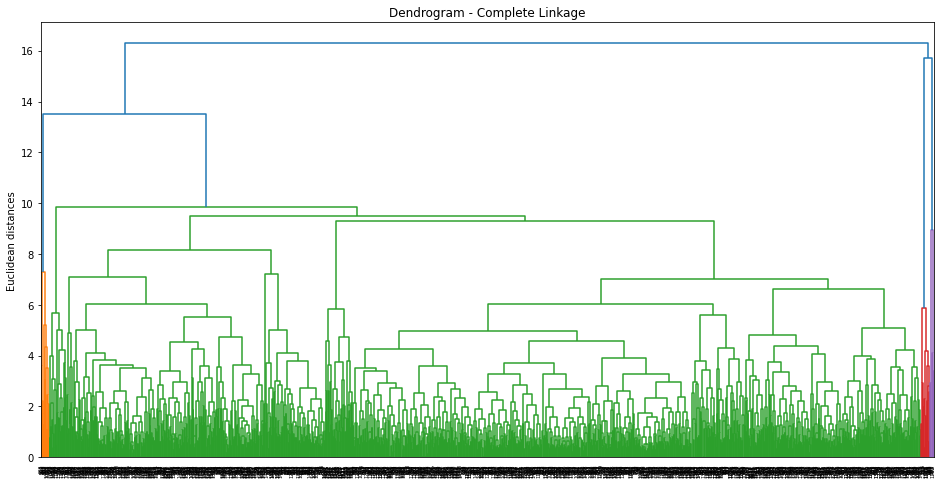

In [19]:
#Agglomerative clustering using complete linkage method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "complete"))

plt.title('Dendrogram - Complete Linkage')
plt.ylabel('Euclidean distances')
plt.show()

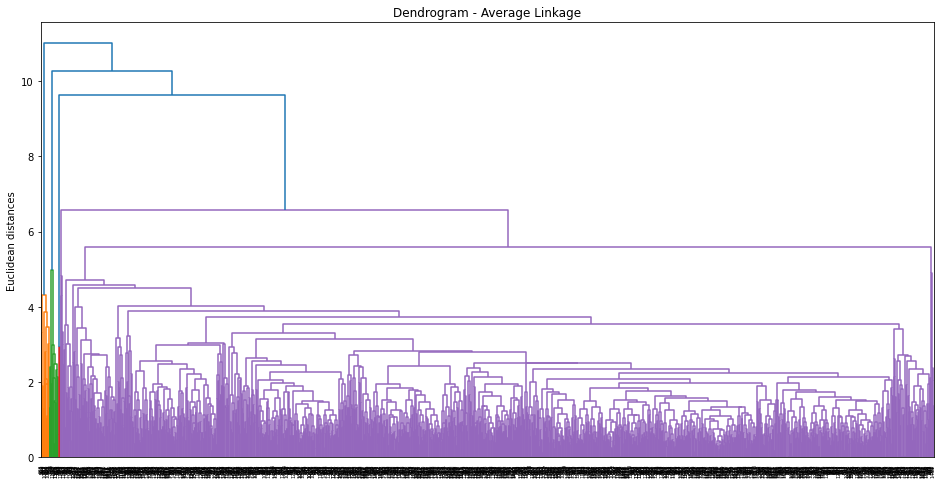

In [20]:
#Agglomerative clustering using average method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "average"))

plt.title('Dendrogram - Average Linkage')
plt.ylabel('Euclidean distances')
plt.show()

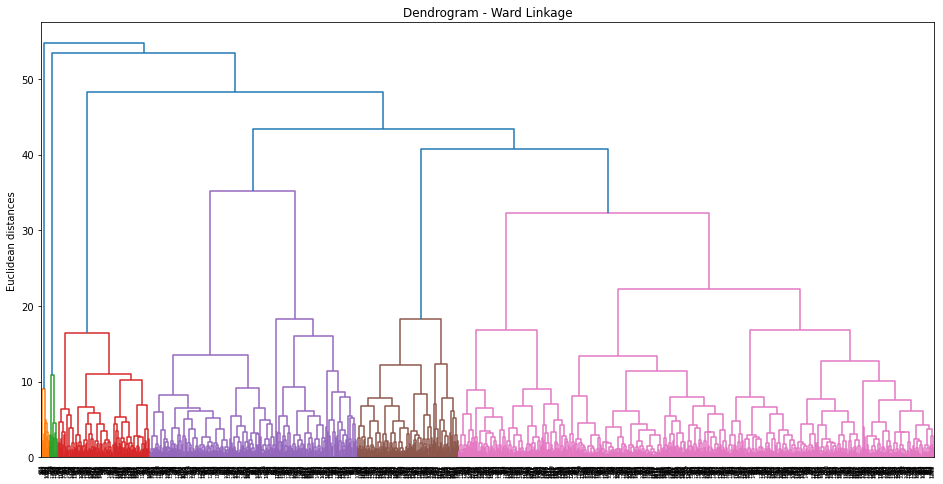

In [21]:
#Agglomerative clustering using ward method
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method  = "ward"))

plt.title('Dendrogram - Ward Linkage')
plt.ylabel('Euclidean distances')
plt.show()

In [22]:
def classification_accuracy(train_data, predicted_clusters, test_data):
    actual_labels = test_data.value_counts().index.tolist()
    train_data['predicted_clusters'] = predicted_clusters
    cluster_labels = pd.value_counts(pd.Series(predicted_clusters))
    cluster_labels = np.stack([cluster_labels.keys().values, cluster_labels.values]).T
    cluster_labels = cluster_labels.tolist()
    for i in range(len(cluster_labels)):
        cluster_labels[i].append(actual_labels[i])
    cluster_labels.sort()
    train_data['predicted_labels'] = list(map(lambda x : cluster_labels[x][2], train_data['predicted_clusters']))
    sum(train_data['predicted_labels']==test_data)
    accuracy = sum(train_data['predicted_labels']==test_data)/len(train_data)
    print("Classification accuracy: ", accuracy)

In [23]:
#Single-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='single')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run single-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df3)

Time taken to run single-linkage agglo. clustering (pre-PCA dataset):  0.05099916458129883
Silhouette score is:  0.4910858497522363
Davies Bouldin score is:  0.5140862930306274
Calinski Harabasz score is:  66.43581732714534
Classification accuracy:  0.30929919137466305


In [24]:
train_df['predicted_clusters'].value_counts()
#   9. Class Distribution. The class is the localization site. Please see Nakai &
#   Kanehisa referenced above for more details.
#   CYT (cytosolic or cytoskeletal)                    463
#   NUC (nuclear)                                      429
#   MIT (mitochondrial)                                244
#   ME3 (membrane protein, no N-terminal signal)       163
#   ME2 (membrane protein, uncleaved signal)            51
#   ME1 (membrane protein, cleaved signal)              44
#   EXC (extracellular)                                 37
#   VAC (vacuolar)                                      30
#   POX (peroxisomal)                                   20
#   ERL (endoplasmic reticulum lumen)                    5


1    1449
0      13
2      11
3       4
7       2
9       1
8       1
6       1
5       1
4       1
Name: predicted_clusters, dtype: int64

Time taken to run single-linkage agglo. clustering (post-PCA dataset):  0.06337618827819824
Silhouette score is:  0.28476025017724177
Davies Bouldin score is:  0.3291565963136813
Calinski Harabasz score is:  18.491532549024583
Classification accuracy:  0.30997304582210244


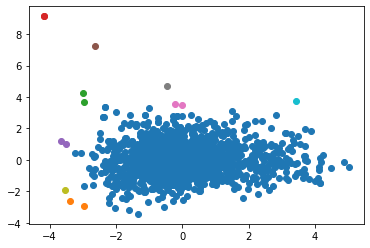

In [25]:
#Single-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='single')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run single-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df3)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [26]:
train_df['predicted_clusters'].value_counts()
#   9. Class Distribution. The class is the localization site. Please see Nakai &
#   Kanehisa referenced above for more details.
#   CYT (cytosolic or cytoskeletal)                    463
#   NUC (nuclear)                                      429
#   MIT (mitochondrial)                                244
#   ME3 (membrane protein, no N-terminal signal)       163
#   ME2 (membrane protein, uncleaved signal)            51
#   ME1 (membrane protein, cleaved signal)              44
#   EXC (extracellular)                                 37
#   VAC (vacuolar)                                      30
#   POX (peroxisomal)                                   20
#   ERL (endoplasmic reticulum lumen)                    5


0    1470
6       2
4       2
3       2
2       2
1       2
9       1
8       1
7       1
5       1
Name: predicted_clusters, dtype: int64

In [27]:
#Complete-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='complete')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run complete-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df3)

Time taken to run complete-linkage agglo. clustering (pre-PCA dataset):  0.182358980178833
Silhouette score is:  0.1815282242846814
Davies Bouldin score is:  1.0363931114745577
Calinski Harabasz score is:  180.38194556309148
Classification accuracy:  0.33557951482479786


In [28]:
train_df['predicted_clusters'].value_counts()
#   9. Class Distribution. The class is the localization site. Please see Nakai &
#   Kanehisa referenced above for more details.
#   CYT (cytosolic or cytoskeletal)                    463
#   NUC (nuclear)                                      429
#   MIT (mitochondrial)                                244
#   ME3 (membrane protein, no N-terminal signal)       163
#   ME2 (membrane protein, uncleaved signal)            51
#   ME1 (membrane protein, cleaved signal)              44
#   EXC (extracellular)                                 37
#   VAC (vacuolar)                                      30
#   POX (peroxisomal)                                   20
#   ERL (endoplasmic reticulum lumen)                    5


3    945
1    328
0    101
6     46
4     29
2     15
8      9
9      5
7      3
5      3
Name: predicted_clusters, dtype: int64

Time taken to run complete-linkage agglo. clustering (post-PCA dataset):  0.1730945110321045
Silhouette score is:  0.22548050140052595
Davies Bouldin score is:  0.8355833283788427
Calinski Harabasz score is:  473.21282058096926
Classification accuracy:  0.3551212938005391


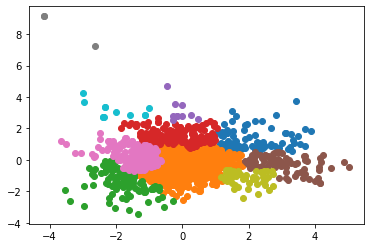

In [29]:
#Complete-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='complete')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run complete-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df3)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [30]:
#Average-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='average')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run average-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df3)

Time taken to run average-linkage agglo. clustering (pre-PCA dataset):  0.2235255241394043
Silhouette score is:  0.29946491095262595
Davies Bouldin score is:  0.7263380917876355
Calinski Harabasz score is:  77.97286071213026
Classification accuracy:  0.3059299191374663


In [31]:
train_df['predicted_clusters'].value_counts()
#   9. Class Distribution. The class is the localization site. Please see Nakai &
#   Kanehisa referenced above for more details.
#   CYT (cytosolic or cytoskeletal)                    463
#   NUC (nuclear)                                      429
#   MIT (mitochondrial)                                244
#   ME3 (membrane protein, no N-terminal signal)       163
#   ME2 (membrane protein, uncleaved signal)            51
#   ME1 (membrane protein, cleaved signal)              44
#   EXC (extracellular)                                 37
#   VAC (vacuolar)                                      30
#   POX (peroxisomal)                                   20
#   ERL (endoplasmic reticulum lumen)                    5


0    1425
4      15
1      14
5      11
2       5
9       4
6       4
3       3
7       2
8       1
Name: predicted_clusters, dtype: int64

Time taken to run average-linkage agglo. clustering (post-PCA dataset):  0.08706164360046387
Silhouette score is:  0.20550090547864175
Davies Bouldin score is:  0.5883606217818859
Calinski Harabasz score is:  193.04540220625245
Classification accuracy:  0.2857142857142857


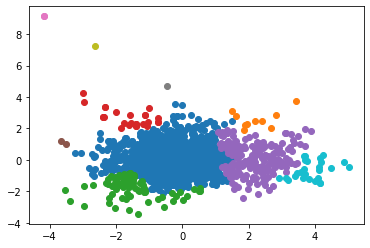

In [32]:
#Average-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='average')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run average-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df3)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [33]:
train_df['predicted_clusters'].value_counts()
#   9. Class Distribution. The class is the localization site. Please see Nakai &
#   Kanehisa referenced above for more details.
#   CYT (cytosolic or cytoskeletal)                    463
#   NUC (nuclear)                                      429
#   MIT (mitochondrial)                                244
#   ME3 (membrane protein, no N-terminal signal)       163
#   ME2 (membrane protein, uncleaved signal)            51
#   ME1 (membrane protein, cleaved signal)              44
#   EXC (extracellular)                                 37
#   VAC (vacuolar)                                      30
#   POX (peroxisomal)                                   20
#   ERL (endoplasmic reticulum lumen)                    5


0    1149
4     186
2      81
9      26
3      26
1      10
6       2
5       2
8       1
7       1
Name: predicted_clusters, dtype: int64

In [34]:
#Ward-linkage on pre-PCA dataset
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='ward')
start_time = time.time()
y_hc = hc.fit_predict(scaled_features_df)
print("Time taken to run ward-linkage agglo. clustering (pre-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(scaled_features_df,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(scaled_features_df, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(scaled_features_df, y_hc))

classification_accuracy(train_df, y_hc, df3)

Time taken to run ward-linkage agglo. clustering (pre-PCA dataset):  0.23201394081115723
Silhouette score is:  0.15138410817122716
Davies Bouldin score is:  1.3815503226351578
Calinski Harabasz score is:  273.72173046930567
Classification accuracy:  0.40902964959568733


In [35]:
train_df['predicted_clusters'].value_counts()
#   9. Class Distribution. The class is the localization site. Please see Nakai &
#   Kanehisa referenced above for more details.
#   CYT (cytosolic or cytoskeletal)                    463
#   NUC (nuclear)                                      429
#   MIT (mitochondrial)                                244
#   ME3 (membrane protein, no N-terminal signal)       163
#   ME2 (membrane protein, uncleaved signal)            51
#   ME1 (membrane protein, cleaved signal)              44
#   EXC (extracellular)                                 37
#   VAC (vacuolar)                                      30
#   POX (peroxisomal)                                   20
#   ERL (endoplasmic reticulum lumen)                    5


2    343
3    263
6    209
1    184
4    152
0    136
9    126
8     42
5     15
7     14
Name: predicted_clusters, dtype: int64

Time taken to run ward-linkage agglo. clustering (post-PCA dataset):  0.15592670440673828
Silhouette score is:  0.2514323448484266
Davies Bouldin score is:  0.8865043796192136
Calinski Harabasz score is:  700.109851927092
Classification accuracy:  0.1347708894878706


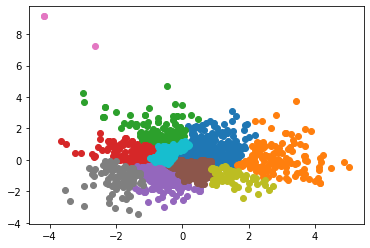

In [36]:
#Ward-linkage on post-PCA dataset
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage ='ward')
start_time = time.time()
y_hc = hc.fit_predict(pca_data)
print("Time taken to run ward-linkage agglo. clustering (post-PCA dataset): ", (time.time()-start_time))
train_df = pd.DataFrame.copy(scaled_features_df)

#silhouette (cohesion compared to separation, high value indicates well matched to its own cluster and poorly to 
#neighboring clusters)
print('Silhouette score is: ', sklearn.metrics.silhouette_score(pca_data,y_hc))

#Davies-Bouldin Index (cluster overlap by measuring the ratio of the sum of within-cluster scatters to between-cluster 
#separations, low value indicates indicates that the clusters are compact and far)
print('Davies Bouldin score is: ', sklearn.metrics.davies_bouldin_score(pca_data, y_hc))

#calinski harabasz score (Well-defined clusters have a large between-cluster variance and a small within-cluster variance,
#larger index value indicates optimal number of clusters)

print('Calinski Harabasz score is: ', sklearn.metrics.calinski_harabasz_score(pca_data, y_hc))

classification_accuracy(train_df, y_hc, df3)

#2D Scatter Plot of Agglomerative Clustering using that uses Annual Income and Spending Score
plt.scatter(pca_data[y_hc==0, 0], pca_data[y_hc==0, 1], cmap ='rainbow', label ='Cluster 1')
plt.scatter(pca_data[y_hc==1, 0], pca_data[y_hc==1, 1], cmap ='rainbow', label ='Cluster 2')
plt.scatter(pca_data[y_hc==2, 0], pca_data[y_hc==2, 1], cmap ='rainbow', label ='Cluster 3')
plt.scatter(pca_data[y_hc==3, 0], pca_data[y_hc==3, 1], cmap ='rainbow', label ='Cluster 4')
plt.scatter(pca_data[y_hc==4, 0], pca_data[y_hc==4, 1], cmap ='rainbow', label ='Cluster 5')
plt.scatter(pca_data[y_hc==5, 0], pca_data[y_hc==5, 1], cmap ='rainbow', label ='Cluster 6')
plt.scatter(pca_data[y_hc==6, 0], pca_data[y_hc==6, 1], cmap ='rainbow', label ='Cluster 7')
plt.scatter(pca_data[y_hc==7, 0], pca_data[y_hc==7, 1], cmap ='rainbow', label ='Cluster 8')
plt.scatter(pca_data[y_hc==8, 0], pca_data[y_hc==8, 1], cmap ='rainbow', label ='Cluster 9')
plt.scatter(pca_data[y_hc==9, 0], pca_data[y_hc==9, 1], cmap ='rainbow', label ='Cluster 10')
plt.show()

In [37]:
train_df['predicted_clusters'].value_counts()
#   9. Class Distribution. The class is the localization site. Please see Nakai &
#   Kanehisa referenced above for more details.
#   CYT (cytosolic or cytoskeletal)                    463
#   NUC (nuclear)                                      429
#   MIT (mitochondrial)                                244
#   ME3 (membrane protein, no N-terminal signal)       163
#   ME2 (membrane protein, uncleaved signal)            51
#   ME1 (membrane protein, cleaved signal)              44
#   EXC (extracellular)                                 37
#   VAC (vacuolar)                                      30
#   POX (peroxisomal)                                   20
#   ERL (endoplasmic reticulum lumen)                    5


0    266
5    258
4    231
3    167
9    154
1    131
2    105
7     96
8     73
6      3
Name: predicted_clusters, dtype: int64